In [343]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from scipy.stats import linregress
import random 

%matplotlib inline

### 1.Informações sobre a base de dados

* Base de dados: Indicadores de desenvolvimento humano de vários países, com seus valores e algumas 
informações adicionais sobre os países

* São 6 bases sendo 2 as mais importantes e utilizadas: country.csv e indicators.csv

* 5656457 indicadores

* 247 países


### 2. Análise exploratória

#### 2.1 Analisando a base Country.csv

In [344]:
df_country = pd.read_csv('Country.csv')
df_country.head(3)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010,2013,2001


* Pergunta: Como são distribuídos os países de acordo com a renda ?

In [345]:
df_country['IncomeGroup'].unique() # Divisão por renda

array(['Low income', 'Upper middle income', 'High income: nonOECD', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

Upper middle income     53
Lower middle income     51
High income: nonOECD    47
High income: OECD       32
Low income              31
Name: IncomeGroup, dtype: int64


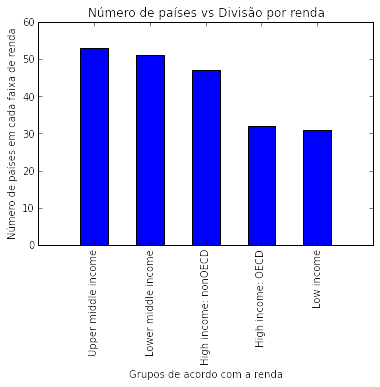

In [346]:
bar_heights = df_country['IncomeGroup'].value_counts()
print(bar_heights)
num_cols =('Upper middle income','Lower middle income','High income: nonOECD','High income: OECD','Low income')

bar_positions = np.arange(5) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positionsitions, bar_heights, 0.5)
ax.set_xticks(range(1, len(num_cols)+1))
ax.set_xticklabels(num_cols, rotation=90)
              
plt.xlabel(u"Grupos de acordo com a renda")
plt.ylabel(u"Número de países em cada faixa de renda")
plt.title(u"Número de países vs Divisão por renda")
plt.show()

* Pergunta: Como os países se distribuem entre as regioões ?

In [347]:
df_country['Region'].unique()

array(['South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'Sub-Saharan Africa',
       'Latin America & Caribbean', nan, 'North America'], dtype=object)

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64


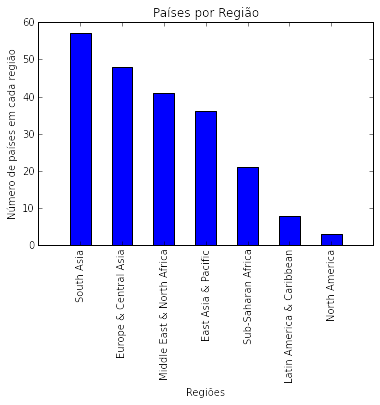

In [348]:
bar_heights = df_country['Region'].value_counts()
print(bar_heights)
num_cols =('South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'North America')

bar_positions = np.arange(7) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(range(1, len(num_cols)+1))
ax.set_xticklabels(num_cols, rotation=90)
              
plt.xlabel(u"Regiões")
plt.ylabel(u"Número de países em cada região")
plt.title(u"Países por Região")
plt.show()

In [349]:
df_country[df_country['IncomeGroup'] == 'Upper middle income']['ShortName'].head(5)

1            Albania
2            Algeria
3     American Samoa
5             Angola
13        Azerbaijan
Name: ShortName, dtype: object

In [350]:
df_country[df_country['IncomeGroup'] == 'Low income']['ShortName'].head(5)

0      Afghanistan
20           Benin
29    Burkina Faso
30         Burundi
32        Cambodia
Name: ShortName, dtype: object

In [351]:
df_country[df_country['IncomeGroup'] == 'High income: OECD']['ShortName'].head(5)

11    Australia
12      Austria
18      Belgium
34       Canada
41        Chile
Name: ShortName, dtype: object

In [352]:
df_country[df_country['CountryCode'] == 'BRA']['IncomeGroup'].head(5)

26    Upper middle income
Name: IncomeGroup, dtype: object

In [353]:
df_country[df_country['Region'] == 'Latin America & Caribbean']['ShortName'].head(10)

6     Antigua and Barbuda
8               Argentina
10                  Aruba
16               Barbados
19                 Belize
23                Bolivia
26                 Brazil
36         Cayman Islands
41                  Chile
43               Colombia
Name: ShortName, dtype: object

In [354]:
df_indicadores = pd.read_csv('Indicators.csv')
df_indicadores.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.000000


In [355]:
df_indicadores['Year'].value_counts().head(5)

2010    187206
2005    180506
2007    180354
2008    179825
2009    178578
Name: Year, dtype: int64

* Pergunta: Quais as métricas que possuem mais valores associados ?

In [356]:
df_indicadores['IndicatorName'].value_counts().head(10)

Population, total                           13484
Population growth (annual %)                13442
Rural population (% of total population)    13415
Urban population (% of total)               13415
Urban population                            13374
Rural population                            13374
Urban population growth (annual %)          13337
Surface area (sq. km)                       13090
Land area (sq. km)                          13086
Rural population growth (annual %)          13061
Name: IndicatorName, dtype: int64

* Descobrindo código dos indicadores

In [357]:
df_indicadores[df_indicadores['IndicatorName'] == 'Life expectancy at birth, total (years)']['IndicatorCode'].unique()

array(['SP.DYN.LE00.IN'], dtype=object)

In [358]:
df_indicadores[df_indicadores['IndicatorName'] == 'Age dependency ratio (% of working-age population)']['IndicatorCode'].unique()

array(['SP.POP.DPND'], dtype=object)

In [359]:
df_indicadores[df_indicadores['IndicatorName'] == 'Unemployment, total (% of total labor force)']['IndicatorCode'].unique()

array(['SL.UEM.TOTL.ZS'], dtype=object)

In [360]:
df_indicadores[(df_indicadores['CountryName'] == 'Argentina') & (df_indicadores['IndicatorCode'] == 'SL.UEM.TOTL.ZS')]['IndicatorCode'].value_counts()

SL.UEM.TOTL.ZS    24
Name: IndicatorCode, dtype: int64

In [361]:
brazil_labor = df_indicadores[(df_indicadores.CountryName=='Brazil')&(df_indicadores.IndicatorCode=='SL.UEM.TOTL.ZS')]
chile_labor = df_indicadores[(df_indicadores.CountryName=='Chile')&(df_indicadores.IndicatorCode=='SL.UEM.TOTL.ZS')]
argentina_labor = df_indicadores[(df_indicadores.CountryName=='Argentina')&(df_indicadores.IndicatorCode=='SL.UEM.TOTL.ZS')]

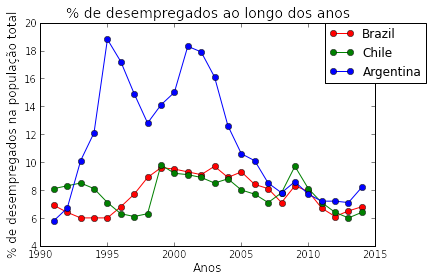

In [362]:
fig = plt.figure()

plt.plot(brazil_labor.Year,brazil_labor.Value,'o-',label='Brazil',color="red")
plt.plot(chile_labor.Year,chile_labor.Value,'o-',label='Chile',color="green")
plt.plot(argentina_labor.Year,argentina_labor.Value,'o-',label='Argentina',color="blue")
plt.legend(bbox_to_anchor=(0.85, 1), loc=2, borderaxespad=0.)
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'% de desempregados na população total',  fontsize=12)
plt.title(u'% de desempregados ao longo dos anos', fontsize=14)

In [363]:
print(df_indicadores.columns)

Index([u'CountryName', u'CountryCode', u'IndicatorName', u'IndicatorCode',
       u'Year', u'Value'],
      dtype='object')


In [364]:
df_indicadores[df_indicadores['IndicatorName'] == 'Population, total']['IndicatorCode'].head(1)

73    SP.POP.TOTL
Name: IndicatorCode, dtype: object

In [365]:
brazil_pop = df_indicadores[(df_indicadores.CountryName=='Brazil')&(df_indicadores.IndicatorCode=='SP.POP.TOTL')]
chile_pop = df_indicadores[(df_indicadores.CountryName=='Chile')&(df_indicadores.IndicatorCode=='SP.POP.TOTL')]
argentina_pop = df_indicadores[(df_indicadores.CountryName=='Argentina')&(df_indicadores.IndicatorCode=='SP.POP.TOTL')]

In [366]:
brazil_pop.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5800,Brazil,BRA,"Population, total",SP.POP.TOTL,1960,72493585
29893,Brazil,BRA,"Population, total",SP.POP.TOTL,1961,74706888
56944,Brazil,BRA,"Population, total",SP.POP.TOTL,1962,77007549
85331,Brazil,BRA,"Population, total",SP.POP.TOTL,1963,79368453
114044,Brazil,BRA,"Population, total",SP.POP.TOTL,1964,81751802


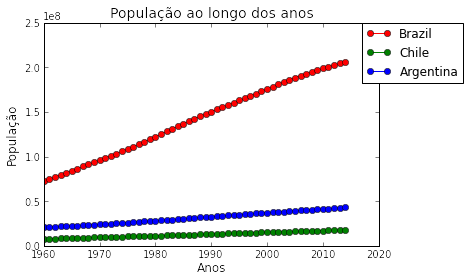

In [367]:
fig = plt.figure()

plt.plot(brazil_pop.Year,brazil_pop.Value,'o-',label='Brazil',color="red")
plt.plot(chile_pop.Year,chile_pop.Value,'o-',label='Chile',color="green")
plt.plot(argentina_pop.Year,argentina_pop.Value,'o-',label='Argentina',color="blue")
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'População',  fontsize=12)
plt.title(u'População ao longo dos anos', fontsize=14)



In [368]:
df_indicadores[df_indicadores['IndicatorName'] == 'Population growth (annual %)']['IndicatorCode'].head(1)

3585    SP.POP.GROW
Name: IndicatorCode, dtype: object

In [369]:
brazil_pop_g = df_indicadores[(df_indicadores.CountryName=='Brazil')&(df_indicadores.IndicatorCode=='SP.POP.GROW')]
chile_pop_g = df_indicadores[(df_indicadores.CountryName=='Chile')&(df_indicadores.IndicatorCode=='SP.POP.GROW')]
argentina_pop_g = df_indicadores[(df_indicadores.CountryName=='Argentina')&(df_indicadores.IndicatorCode=='SP.POP.GROW')]

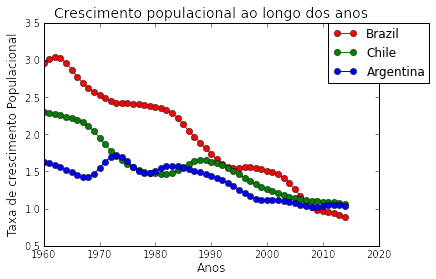

In [370]:
fig = plt.figure()

plt.plot(brazil_pop_g.Year,brazil_pop_g.Value,'o-',label='Brazil',color="red")
plt.plot(chile_pop_g.Year,chile_pop_g.Value,'o-',label='Chile',color="green")
plt.plot(argentina_pop_g.Year,argentina_pop_g.Value,'o-',label='Argentina',color="blue")
plt.legend(bbox_to_anchor=(0.85, 1), loc=2, borderaxespad=0.)
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'Taxa de crescimento Populacional',  fontsize=12)
plt.title(u'Crescimento populacional ao longo dos anos', fontsize=14)



In [371]:
df_indicadores[df_indicadores['IndicatorName'] == 'GNI per capita, Atlas method (current US$)']['IndicatorCode'].head(1)

50138    NY.GNP.PCAP.CD
Name: IndicatorCode, dtype: object

In [372]:
brazil_income_g = df_indicadores[(df_indicadores.CountryName=='Brazil')&(df_indicadores.IndicatorCode=='NY.GNP.PCAP.CD')]
chile_income_g = df_indicadores[(df_indicadores.CountryName=='Chile')&(df_indicadores.IndicatorCode=='NY.GNP.PCAP.CD')]
argentina_income_g = df_indicadores[(df_indicadores.CountryName=='Argentina')&(df_indicadores.IndicatorCode=='NY.GNP.PCAP.CD')]

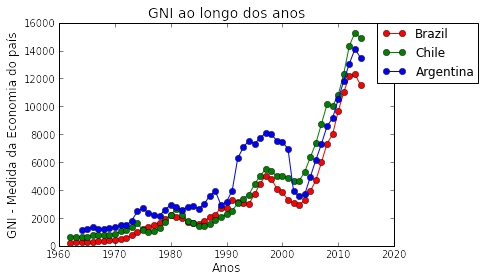

In [373]:
fig = plt.figure()

plt.plot(brazil_income_g.Year,brazil_income_g.Value,'o-',label='Brazil',color="red")
plt.plot(chile_income_g.Year,chile_income_g.Value,'o-',label='Chile',color="green")
plt.plot(argentina_income_g.Year,argentina_income_g.Value,'o-',label='Argentina',color="blue")
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'GNI - Medida da Economia do país',  fontsize=12)
plt.title(u'GNI ao longo dos anos', fontsize=14)

In [374]:
brazil_exp_ = df_indicadores[(df_indicadores.CountryName=='Brazil')&(df_indicadores.IndicatorCode=='SP.DYN.LE00.IN')]
chile_exp_ = df_indicadores[(df_indicadores.CountryName=='Chile')&(df_indicadores.IndicatorCode=='SP.DYN.LE00.IN')]
argentina_exp_ = df_indicadores[(df_indicadores.CountryName=='Argentina')&(df_indicadores.IndicatorCode=='SP.DYN.LE00.IN')]

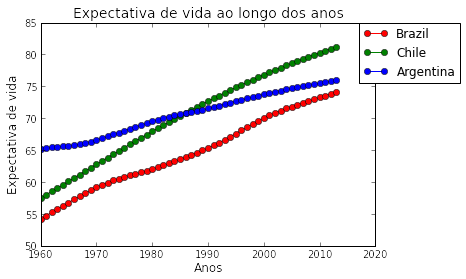

In [375]:
fig = plt.figure()

plt.plot(brazil_exp_.Year,brazil_exp_.Value,'o-',label='Brazil',color="red")
plt.plot(chile_exp_.Year,chile_exp_.Value,'o-',label='Chile',color="green")
plt.plot(argentina_exp_.Year,argentina_exp_.Value,'o-',label='Argentina',color="blue")
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'Expectativa de vida',  fontsize=12)
plt.title(u'Expectativa de vida ao longo dos anos', fontsize=14)

In [376]:
br_2013 = brazil_exp_[brazil_exp_['Year'] == 2013]['Value']
chile_2013 = chile_exp_[chile_exp_['Year'] == 2013]['Value']
arg_2013 = argentina_exp_[argentina_exp_['Year'] == 2013]['Value']
print(br_2013.values,
      chile_2013.values,
      arg_2013.values )

(array([ 74.12243902]), array([ 81.19792683]), array([ 75.98609756]))


* Pergunta: Entendendo a relação entre os indicadores !

### 3. Pre-processamento dos dados para predição da expectativa de vida no Brasil

In [377]:
inputdataset = df_indicadores.copy()
inputdataset = inputdataset.drop(['CountryName','IndicatorName'], axis=1)

#### 3.1 Pre-processamento

In [378]:
nans = inputdataset['Value'].isnull().values.any() # Remoção dos null values
n_countries = inputdataset['CountryCode'].unique().shape[0] 
n_years = inputdataset['Year'].unique().shape[0]
n_features = inputdataset['IndicatorCode'].unique().shape[0]
output = inputdataset.ix[inputdataset['IndicatorCode']=='SP.DYN.LE00.IN', ['CountryCode','Year','Value']]

#### 3.2 Análise da exp. de vida ao longo do tempo

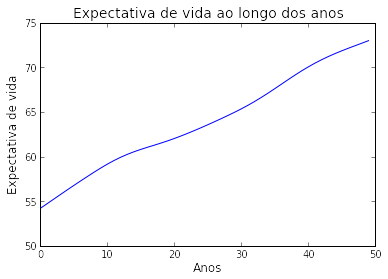

In [389]:
Bra_code = np.array(df_country.ix[df_country['TableName']=='Brazil','CountryCode'])[0]
expe = output.ix[output['CountryCode']==Bra_code,['Year','Value']]
expectativa_de_vida = expectativa_de_vida.reset_index().drop('index',1)
serie = population_['Value']
#print(serie)
X_train = serie[:len(serie)-4]
X_test = serie[len(X_train):]
plt.figure()
plt.plot(X_train)
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'Expectativa de vida',  fontsize=12)
plt.title(u'Expectativa de vida ao longo dos anos', fontsize=14)

#### 3.3 Estimando parâmetros - modelo linear

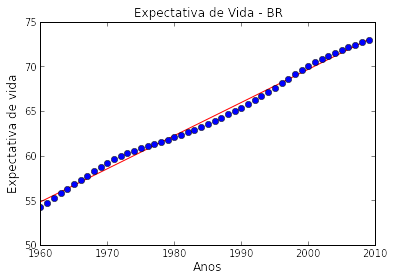

In [390]:
A = np.array([expectativa_de_vida.ix[range(len(X_train)),'Year'], np.ones(len(X_train))])
y = np.array(X_train)
w = np.linalg.lstsq(A.T,y)[0] # obtenção dos parâmetros
line = w[0]*expectativa_de_vida.ix[range(len(X_train)),'Year']+w[1] #regressão
plt.figure()
plt.plot(expectativa_de_vida.ix[range(len(X_train)),'Year'],line,'r-',expectativa_de_vida.ix[range(len(X_train)),'Year'],y,'o')
plt.title(u'Expectativa de Vida - BR')
plt.xlabel(u'Anos',  fontsize=12)
plt.ylabel(u'Expectativa de vida',  fontsize=12)

#### 3.3 Predição da população

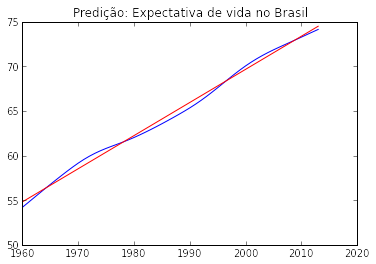

In [381]:
prediction = w[0]*expectativa_de_vida['Year']+w[1]
plt.figure()
plt.plot(expectativa_de_vida['Year'],expectativa_de_vida['Value'],'b',expectativa_de_vida['Year'],prediction,'r-')
plt.title(u'Predição: Expectativa de vida no Brasil')

#### 3.4 Erro associado

In [382]:
Error = np.abs(prediction[-4:]-np.array(expectativa_de_vida.ix[len(expectativa_de_vida)-4:,'Value']))
Erroraverage = Error.mean()
percentage = (Erroraverage/(expectativa_de_vida['Value'].max()-expectativa_de_vida['Value'].min()))*100                   
print ('Error mean percentage is %0.4f%%' % percentage)

Error mean percentage is 1.1564%


#### 3.5 Resultado

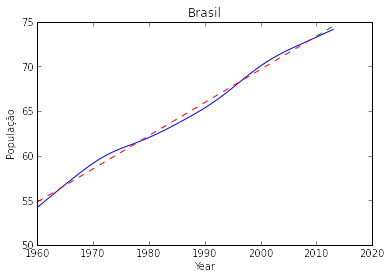

In [383]:
plt.figure()
plt.plot(expectativa_de_vida['Year'],expectativa_de_vida['Value'],'b')
plt.plot(expectativa_de_vida.ix[:len(expectativa_de_vida)-4,'Year'],prediction[:-3],'r--')
plt.plot(expectativa_de_vida.ix[len(expectativa_de_vida)-4:,'Year'],prediction[-4:],'g--')
plt.title('Brasil')
plt.xlabel('Year')
plt.ylabel(u'População')

* Pergunta: Qual a população do Brasil em 2015 e em 2016?

In [384]:
output2015 = w[0]*2015+w[1]
real2015 = 74.6
future_error = 100*(np.abs(real2015-output2015)/real2015)

In [385]:
print ('A expectativa de vida no Brasil em 2015 é {}'.format(output2015))


A expectativa de vida no Brasil em 2015 é 75.2239234351


In [386]:
output2016 = w[0]*2016+w[1]
real2016 = 75.5
future_error = 100*(np.abs(real2016-output2016)/real2016)

In [387]:
print ('A expectativa de vida no Brasil em 2016 é {}'.format(output2016))


A expectativa de vida no Brasil em 2016 é 75.5950593974


In [388]:
print ('E o erro associado ao valor real é {}'.format(future_error))

E o erro associado ao valor real é 0.125906486645
